In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset
file_path = "car_purchase_dataset.csv"  # Path to the dataset file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Age  EstimatedSalary  Purchased
0   56            81228          0
1   69           134752          1
2   46            68984          0
3   32            60774          0
4   60            22568          0


In [3]:
# Define features and target variable
X = data[['Age', 'EstimatedSalary']]  # Features
y = data['Purchased']  # Target variable


In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")


Training data size: 80
Testing data size: 20


In [5]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [6]:
# Make predictions
y_pred = model.predict(X_test)


In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.75
Confusion Matrix:
[[15  0]
 [ 5  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.00      0.00      0.00         5

    accuracy                           0.75        20
   macro avg       0.38      0.50      0.43        20
weighted avg       0.56      0.75      0.64        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


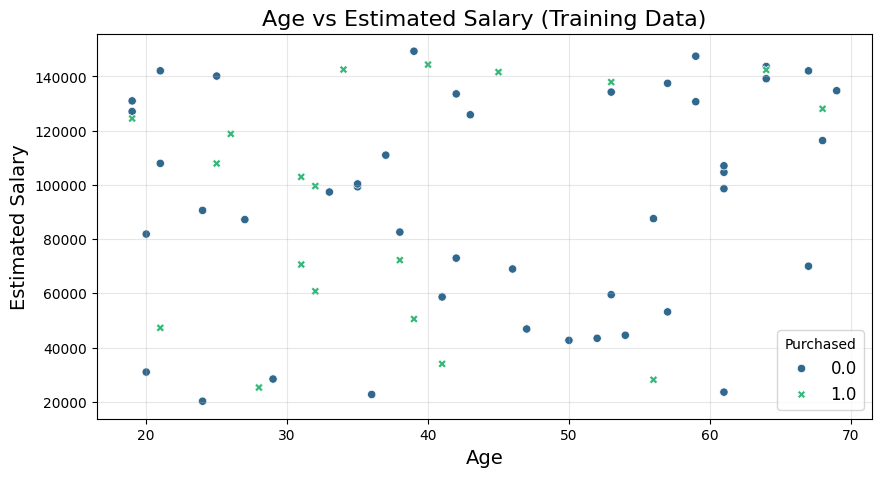

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine training data for visualization
train_data = pd.DataFrame(X_train, columns=['Age', 'EstimatedSalary'])
train_data['Purchased'] = y_train.reset_index(drop=True)

# Scatter plot of Age vs. EstimatedSalary, colored by Purchased
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='Age',
    y='EstimatedSalary',
    hue='Purchased',
    style='Purchased',
    palette='viridis',
    data=train_data
)

plt.title('Age vs Estimated Salary (Training Data)', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Estimated Salary', fontsize=14)
plt.legend(title='Purchased', fontsize=12)
plt.grid(alpha=0.3)
plt.show()
